In [ ]:
!mkdir input
%cd input
!gdown --fuzzy "https://drive.google.com/file/d/1YLSJFFBxDbECtKvWPaqoxCdRRSzJsz_1/view?usp=sharing"

In [ ]:
%cd /home/iiitdwd/Prachit/yolo_pose_fresh
!gdown --folder --fuzzy "https://drive.google.com/drive/folders/1jqAtaHGO3nsa_d6d_bKYg9YRZ9YC9DU8?usp=sharing"

In [3]:
!rm -rf results/
!rm -rf __pycache__
!rm -rf utils/__pycache__

In [1]:
%run main.py \
  --video "../Person_New/input/My Movie.mp4" \
  --output "results/MyMovie.mp4" \
  --results_dir "results" \
  --save_bbox_info \
  --merge_ids \
  --use_transreid \
  --save_video \
  --start_frame 0 \
  --end_frame 200 \
  --display

Device configuration:
 - default: mps
 - detection: mps
 - pose: cpu
 - reid: mps
 - segmentation: mps
 - opengait: mps
Initializing components...
Using TransReID for robust re-identification and tracking
Loading TransReID weights from weights/transreid_vitbase.pth...
using stride: 16, and patch number is num_y16 * num_x8
TransReID model has 86,515,432 parameters
TransReID Model Architecture:
TransReID
  - patch_embed: PatchEmbed
  - pos_drop: Dropout
  - blocks: ModuleList
  - norm: LayerNorm
  - fc: Linear
  - gem: GeneralizedMeanPooling
Interpolating position embeddings:
  - Checkpoint grid: 21×10 (210 patches)
  - Model grid: 16×8 (128 patches)
TransReID weights loaded successfully.
TransReID model loaded successfully on mps
Loading YOLO11 segmentation model...
YOLO11 segmentation model loaded on mps
Loading OpenGait embedder...
Loaded weights from weights/GaitBase_DA-60000.pt
Writing output to results/MyMovie.mp4
Starting enhanced video processing with OpenGait features...


Processing frames:  14%|█▍        | 29/200 [00:42<04:08,  1.45s/it]


KeyboardInterrupt: 

=== Enhanced Bidirectional LSTM Gait Recognition Training ===
Configuration: {
  "sequence_length": 20,
  "step_size": 5,
  "hidden_size": 64,
  "num_layers": 2,
  "batch_size": 16,
  "num_epochs": 100,
  "learning_rate": 0.001,
  "dropout": 0.2,
  "min_frames_per_person": 40,
  "patience": 20,
  "output_dir": "lstm_results"
}
🍎 Using Apple Metal Performance Shaders (MPS)
   PyTorch MPS available: True
🔧 DataLoader workers: 2
Loading and preprocessing data...
Loaded data shape: (10135, 45)
Columns: ['track_id', 'frame_idx', 'person_name', 'frame_center_x', 'frame_center_y', 'frame_width', 'frame_height', 'frame_body_height', 'num_valid_keypoints', 'left_knee_angle', 'right_knee_angle', 'frame_avg_displacement', 'frame_max_displacement', 'frame_displacement_std', 'interpolated', 'norm_norm_ratio_neck_to_right_shoulder_to_shoulder', 'norm_norm_ratio_neck_to_left_shoulder_to_shoulder', 'norm_norm_ratio_right_shoulder_to_right_elbow_to_shoulder', 'norm_norm_ratio_right_elbow_to_right_wrist

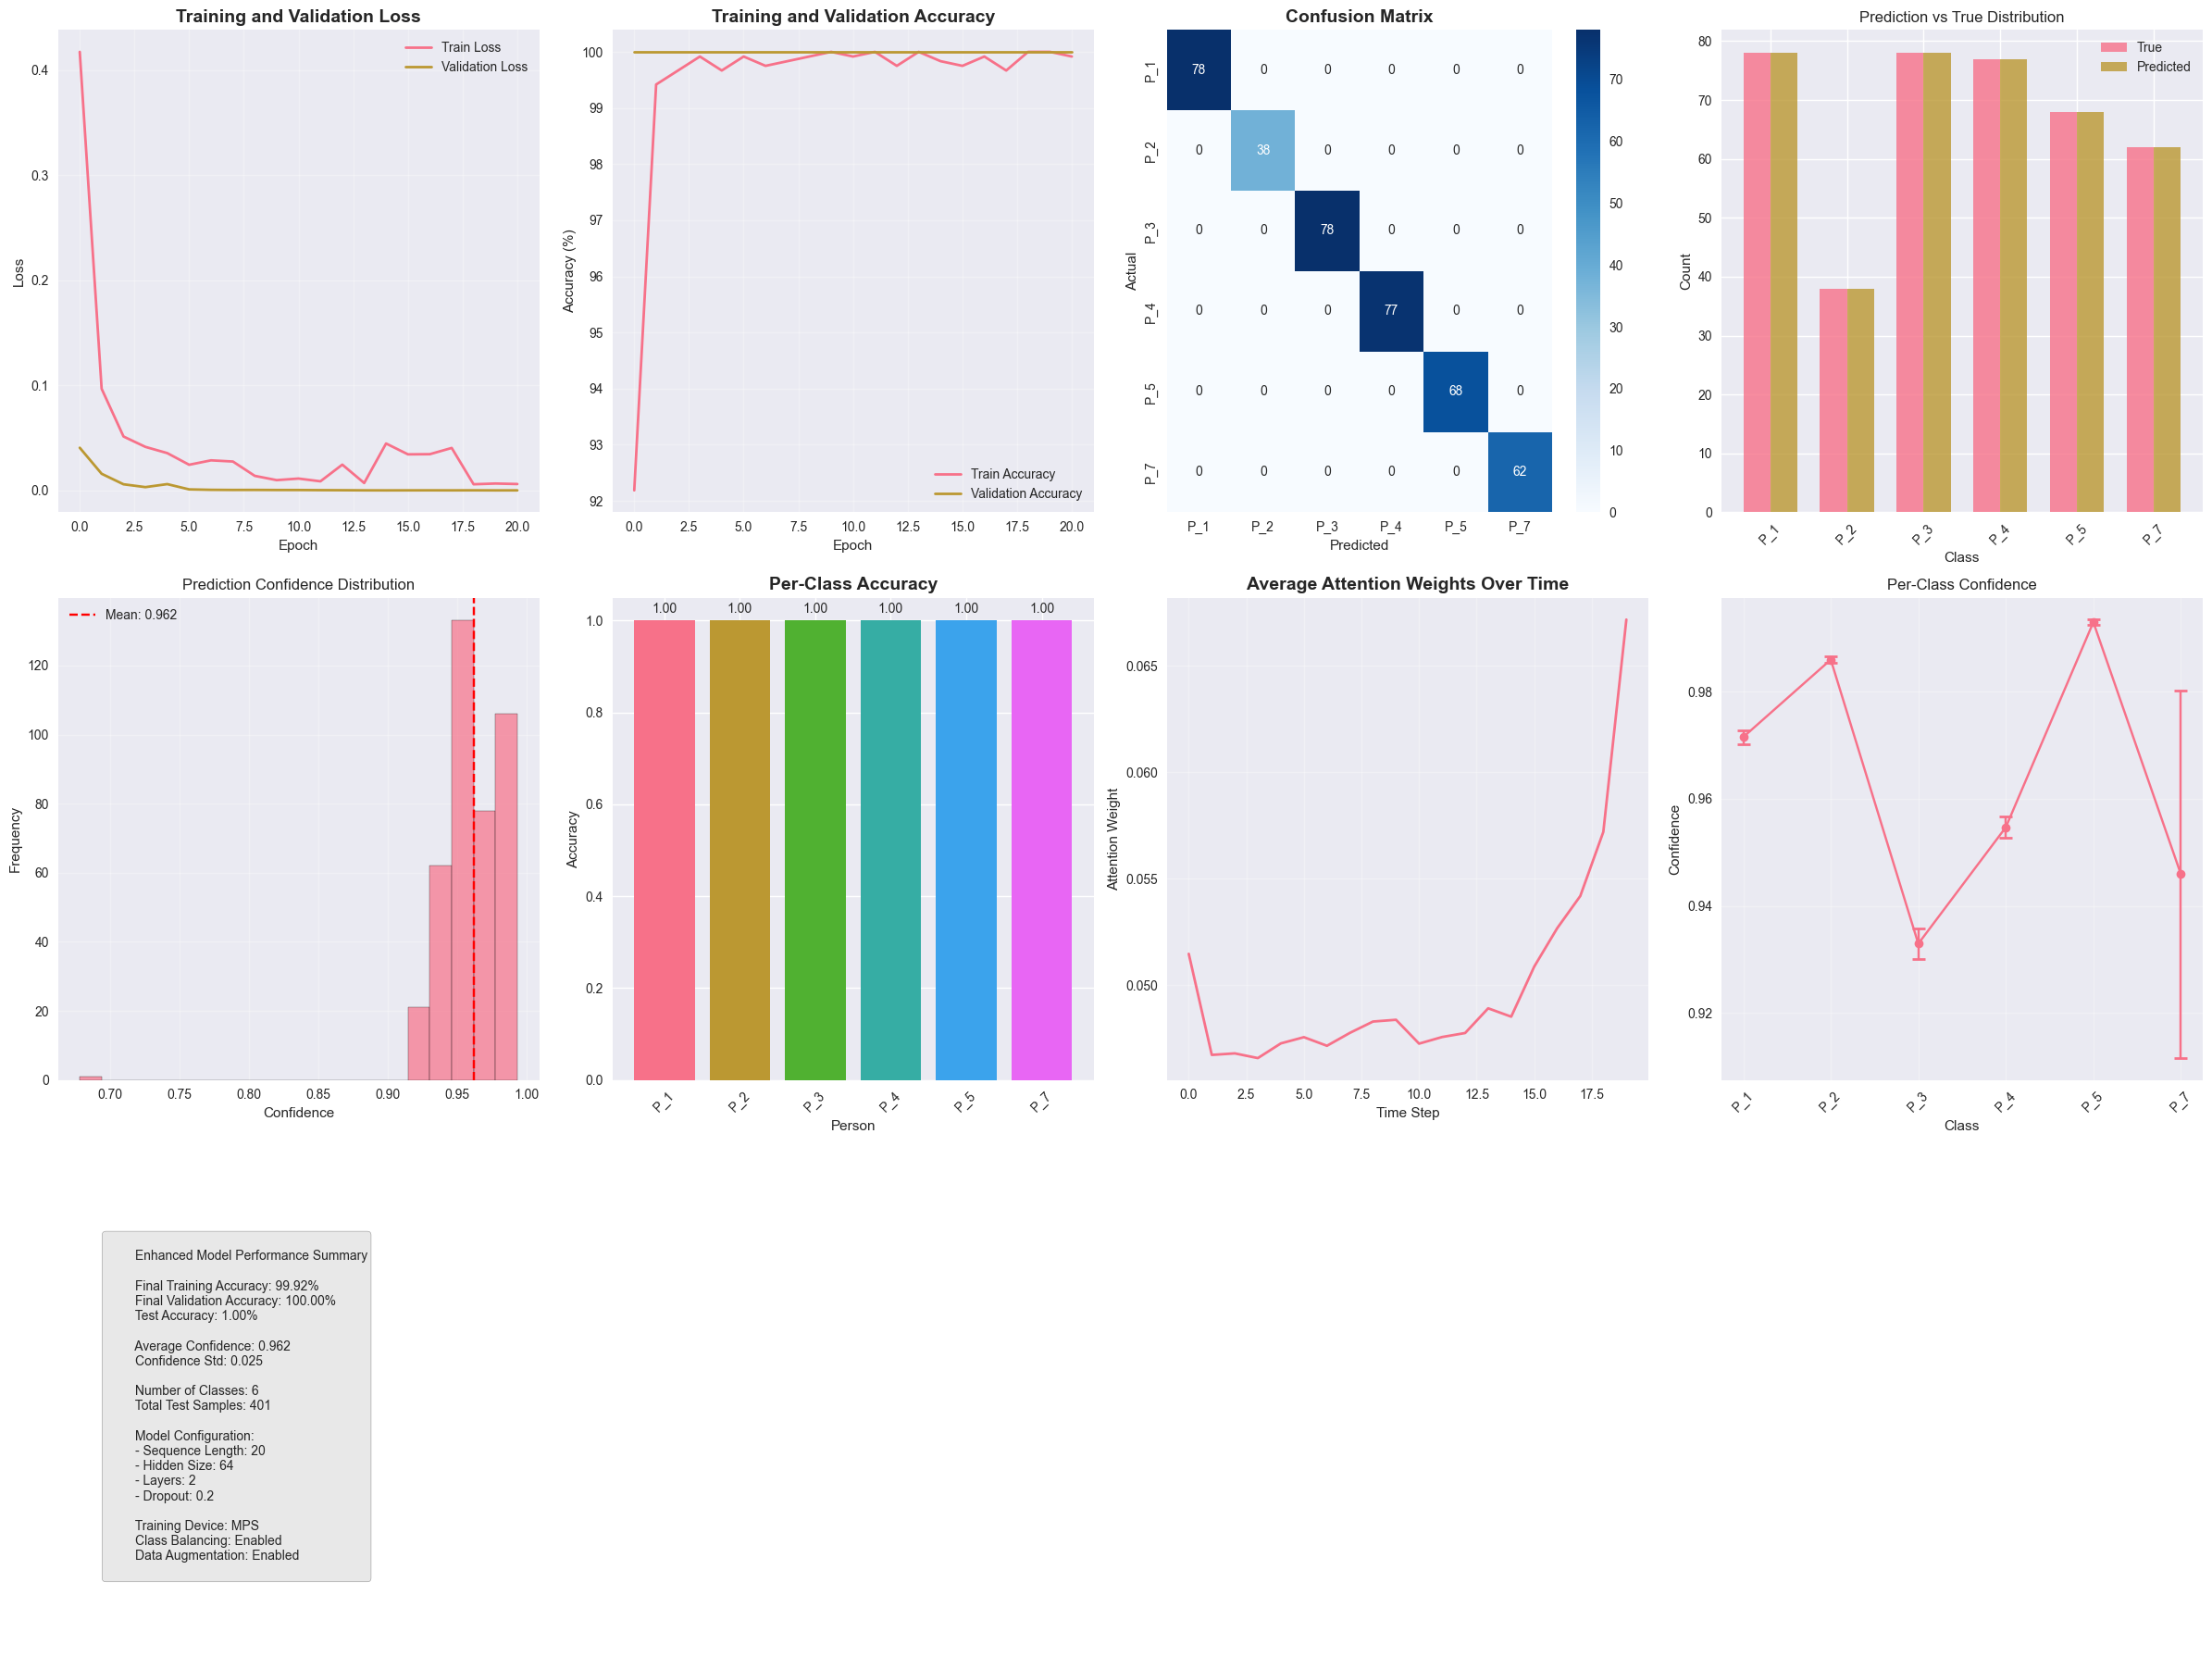

Enhanced results saved to lstm_results

=== Enhanced Training Complete ===
Final Test Accuracy: 1.0000
Average Confidence: 0.9618
Training Device: mps
Results saved to: lstm_results


In [2]:
%run train_lstm_gait.py \
    --data "results/My Movie_frame_features.csv"

In [1]:
# Use the enhanced inference script
%run gait_inference.py \
    --video ../Person_New/input/3c.mp4 \
    --model lstm_results/best_model.pth \
    --output results/enhanced_inference.mp4 \
    --confidence_threshold 0.4 \
    --debug

🍎 Using Apple Metal Performance Shaders (MPS)
   PyTorch MPS available: True
🚀 Starting Enhanced Gait Recognition with Conflict Resolution...
🍎 Using Apple Metal Performance Shaders (MPS)
   PyTorch MPS available: True
Loading model from lstm_results/best_model.pth...
🔍 Model Configuration:
   Input size: 41
   Classes: 6
   Hidden size: 64
   Sequence length: 20
   Class mapping: {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 7}
✓ Loaded feature scaler
   Scaler stats: mean range [0.000, 81.481]
   Scaler stats: scale range [0.038, 176.157]
✅ Enhanced Gait Inference with Conflict Resolution Initialized
   Model: 6 classes
   Features: 41
   Device: mps
   Enhanced thresholds: conf=0.4, consistency=0.8
   Conflict resolution: enabled
🍎 Using Apple Metal Performance Shaders (MPS)
   PyTorch MPS available: True
Using TransReID for robust re-identification and tracking
Loading TransReID weights from weights/transreid_vitbase.pth...
using stride: 16, and patch number is num_y16 * num_x8
TransReID model